In [72]:
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os

CW = pd.read_csv("C:/Users/diann/OneDrive/Bureaublad/countries of the world.csv")
CW.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [36]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Top-3 of the countries with the most coast per area
1. Mircronesia
2. Palau
3. Mariana Islands

In [73]:
CW['Coastline (coast/area ratio)'] = CW['Coastline (coast/area ratio)'].apply(lambda x: x.replace(',','.')) 
CW['Coastline (coast/area ratio)'] = CW['Coastline (coast/area ratio)'].astype('float64')
CW.sort_values('Coastline (coast/area ratio)', ascending= False)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
136,"Micronesia, Fed. St.",OCEANIA,108004,702,"153,9",870.66,"-20,99","30,21",2000.0,"89,0","114,8","5,71","45,71","48,58",2,"24,68","4,75","0,289","0,152","0,559"
157,Palau,OCEANIA,20579,458,"44,9",331.66,"2,85","14,84",9000.0,"92,0","325,6","8,7","4,35","86,95",2,"18,03","6,8","0,062","0,12","0,818"
153,N. Mariana Islands,OCEANIA,82459,477,"172,9",310.69,"9,61","7,11",12500.0,"97,0","254,7","13,04","4,35","82,61",2,"19,43","2,29",NaN,NaN,NaN
127,Maldives,ASIA (EX. NEAR EAST),359008,300,"1196,7",214.67,0,"56,52",3900.0,"97,2","90,0","13,33","16,67",70,2,"34,81","7,06","0,2","0,18","0,62"
138,Monaco,WESTERN EUROPE,32543,2,"16271,5",205.00,"7,75","5,43",27000.0,"99,0","1035,6",0,0,100,NaN,"9,19","12,91","0,17",NaN,NaN
22,Bermuda,NORTHERN AMERICA,65773,53,"1241,0",194.34,"2,49","8,53",36000.0,"98,0","851,4",20,0,80,2,"11,4","7,74","0,01","0,1","0,89"
78,Gibraltar,WESTERN EUROPE,27928,7,"3989,7",171.43,0,"5,13",17500.0,NaN,"877,7",0,0,100,NaN,"10,74","9,31",NaN,NaN,NaN
122,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0",146.43,"4,86","4,39",19400.0,"94,5","384,9",0,0,100,2,"8,48","4,47","0,001","0,072","0,927"
144,Nauru,OCEANIA,13287,21,"632,7",142.86,0,"9,95",5000.0,NaN,"143,0",0,0,100,2,"24,76","6,7",NaN,NaN,NaN
108,Kiribati,OCEANIA,105432,811,"130,0",140.94,0,"48,52",800.0,NaN,"42,7","2,74","50,68","46,58",2,"30,65","8,26","0,089","0,242","0,668"


Amount of population against the net migration

In [13]:
iplot([go.Histogram2dContour(x=CW.head(500)['Net migration'], 
                             y=CW.head(500)['Population'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=CW.head(1000)['Net migration'], y=CW.head(1000)['Population'], mode='markers')])

The population per country

In [14]:
data = dict(type='choropleth',
locations = CW['Country'],
locationmode = 'country names', z = CW['Population'],
text = CW['Country'], colorbar = {'title':'Amount'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [15]:
layout = dict(title='Population per country',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [16]:
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

In [ ]:
GPD per country

In [17]:
data = dict(type='choropleth',
locations = CW['Country'],
locationmode = 'country names', z = CW['GDP ($ per capita)'],
text = CW['Country'], colorbar = {'title':'$ per capita'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [18]:
layout = dict(title='GDP per country',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [19]:
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Distribution of climates in the world

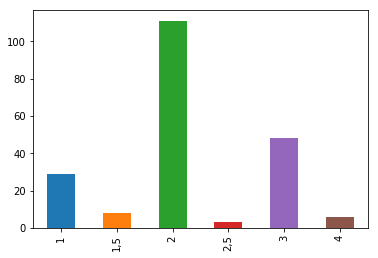

In [25]:
CW['Climate'].value_counts().sort_index().plot.bar()

Distribution of countries per region

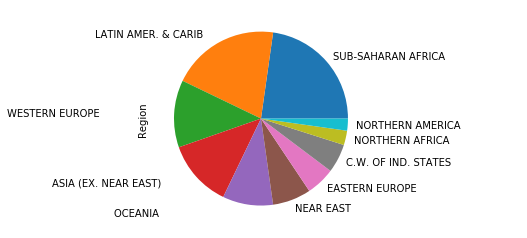

In [46]:
CW['Region'].value_counts().head(10).plot.pie()

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

count      227
unique     151
top       0,00
freq        44
Name: Coastline (coast/area ratio), dtype: object

174